In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles

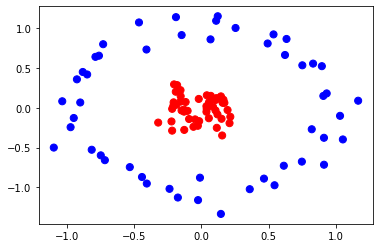

In [26]:
x,y=make_circles(100, factor=0.15, noise=0.1,random_state=0)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='bwr')

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
classifier=SVC(kernel='linear')
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.4

Because our data is not linearly separable.

In [20]:
zero_one_colourmap = ListedColormap(('blue', 'green'))
def plot_decision_boundary(x, y, clf):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


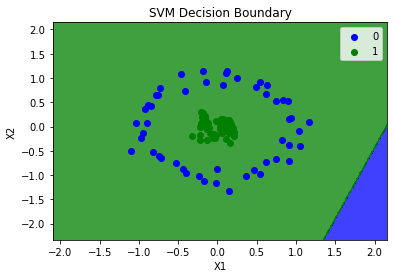

In [29]:
plot_decision_boundary(x, y, classifier)

In [24]:
def plot_3d(x,y):
    r=np.exp(-(x**2).sum(1))
    ax=plt.subplot(projection='3d')
    ax.scatter3D(x[:,0],x[:,1],r,c=y,s=100,cmap='bwr')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    return ax

<Axes3DSubplot:xlabel='x', ylabel='y'>

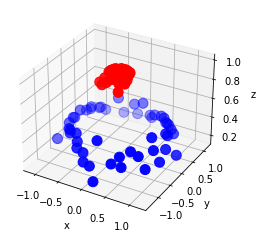

In [30]:
plot_3d(x,y)

In [31]:
rbf_classifier=SVC(kernel='rbf')
rbf_classifier.fit(xtrain,ytrain)
ypred2=rbf_classifier.predict(xtest)

In [32]:
accuracy_score(ytest,ypred2)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


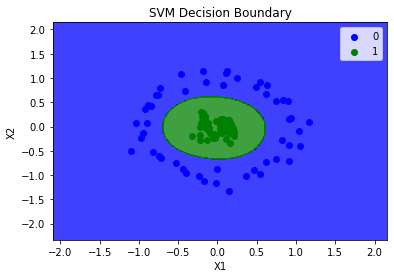

In [33]:
plot_decision_boundary(x,y,rbf_classifier)

#### Using polynomial kernal 

In [34]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(xtrain, ytrain)
ypred3 = poly_classifier.predict(xtest)

In [35]:
accuracy_score(ytest,ypred3)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


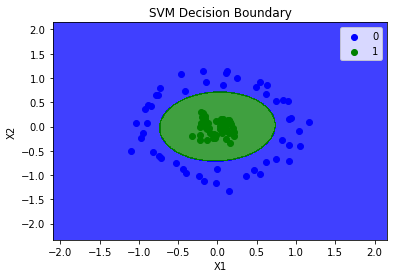

In [36]:
plot_decision_boundary(x,y,poly_classifier)

But what is happening inside RBF

In [37]:
x

array([[-0.94957536, -0.12813035],
       [ 0.11949179, -0.08266508],
       [ 0.93214973,  0.18081215],
       [ 0.08598976,  0.01409304],
       [-0.21750218, -0.01327843],
       [ 0.1575937 ,  0.06353986],
       [-0.40867925,  0.73225992],
       [-0.12922162, -0.04859505],
       [ 0.11080391,  0.1211057 ],
       [ 0.03751945, -0.05005141],
       [ 0.04037614,  0.15700669],
       [ 0.11453276, -0.25173781],
       [-0.0469414 , -0.1456973 ],
       [ 0.12157863,  1.15057745],
       [ 0.49287043,  0.8082293 ],
       [-0.81607272, -0.52736928],
       [-0.88256159,  0.45011628],
       [-0.90136274,  0.06675095],
       [-0.44207091, -0.86978873],
       [ 0.63318667,  0.8650562 ],
       [ 0.74738819, -0.67652354],
       [ 0.07005748,  0.14988009],
       [ 0.83076047,  0.55536396],
       [-0.15555336,  0.07759754],
       [ 0.91209859, -0.71548415],
       [ 1.05235514, -0.39770103],
       [ 0.62194713,  0.66363424],
       [ 0.20927443, -0.19310581],
       [ 0.05680908,

In [38]:
np.exp(-(x**2)).sum(1)

array([1.38959841, 1.97901294, 1.38724695, 1.99243444, 1.95361805,
       1.97144092, 1.43114799, 1.98108172, 1.973238  , 1.99609127,
       1.97402135, 1.92556223, 1.97679495, 1.25144188, 1.30469316,
       1.27097971, 1.27550468, 1.4393216 , 1.29177454, 1.14285979,
       1.20476288, 1.97289037, 1.23609435, 1.97009026, 1.03455639,
       1.18410793, 1.3229867 , 1.92054625, 1.99178057, 1.98730819,
       1.96514507, 1.87448994, 1.97988456, 1.95556961, 1.967292  ,
       1.33022831, 1.11398689, 1.95870336, 1.87653043, 1.98281955,
       1.24881451, 1.96965471, 1.13143655, 1.22992114, 1.20858442,
       1.23782451, 1.12237833, 1.25817   , 1.2596795 , 1.32095212,
       1.97188806, 1.98108612, 1.41714241, 1.25189914, 1.27076602,
       1.94207853, 1.29027691, 1.25010427, 1.30406785, 1.97858989,
       1.30304809, 1.24533222, 1.92825924, 1.98793649, 1.86778573,
       1.92268446, 1.32661518, 1.94100736, 1.41240154, 1.86246506,
       1.21058886, 1.07813697, 1.3350023 , 1.95888082, 1.96205

In [39]:
xnew=np.exp(-(x**2))

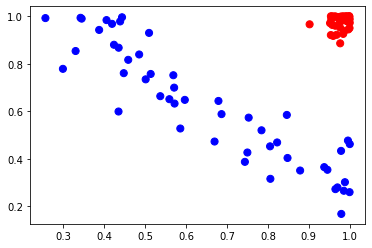

In [40]:
plt.scatter(xnew[:,0],xnew[:,1],c=y,s=50,cmap='bwr')

Here in 2d also, we can classify the categories using rbf